**Version vectorizado**

puntos dentro de la curva 7062
[[1.84239702 0.12680933]
 [1.65877505 0.80895953]
 [1.92584042 0.33317324]
 ...
 [1.73723604 0.5077858 ]
 [1.29829284 0.18341521]
 [1.13836453 0.27431659]]


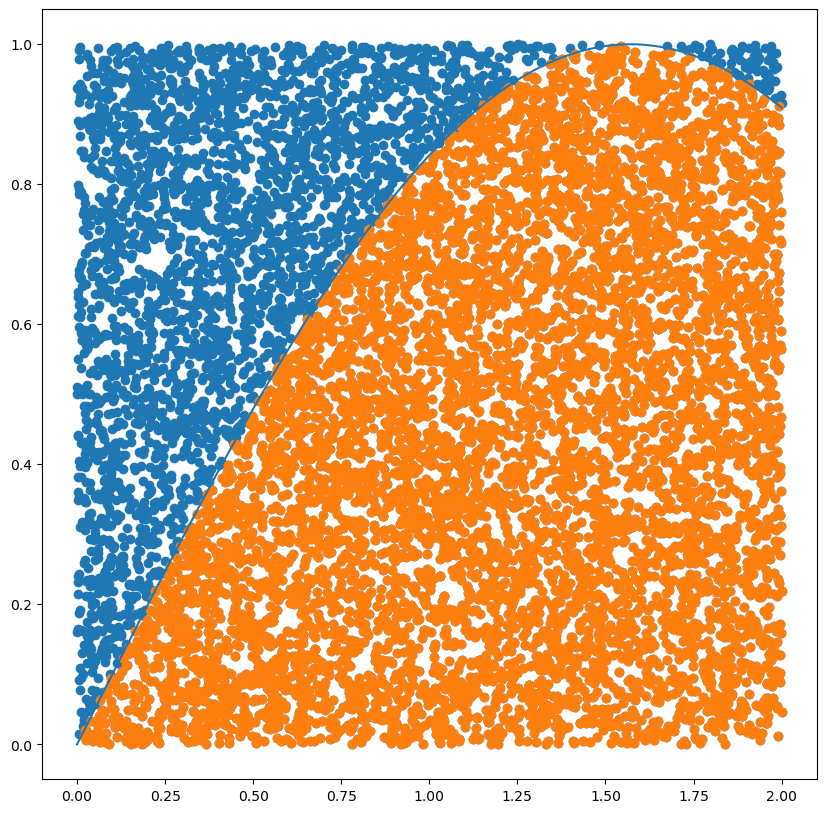

1.4123999989119946


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import optimize

a=0
b=2

def funcion_vector(z):
    return abs(math.sin(z))

prueba_funcion = funcion_vector

def integra_mc(fun, a, b, num_puntos):


    # generar puntos--------------------
    x = np.random.rand(num_puntos)*b #*b para asegurarnos que los puntos al azar esten desplegados por toda la region
    y = np.random.rand(num_puntos)



    ###generar valores de funcion
    z = np.linspace(a,b,num_puntos)
    f_z=[fun(i) for i in z]

    ##saber el maximo valor de la funcion de forma manual
    maximo_valor= max([fun(i) for i in z])


    ## para obtener los puntos como coodernadas [[1,2],[2,3]...]
    puntos=np.column_stack((x,y))


    #para filtros    
    def valor_y_menor_a_la_curva(sublist):
        return fun(sublist[0])>sublist[1]

    #para filtros
    def valor_x_entre_a_b(sublist):
        return sublist[0] >a and sublist[0]<b

    # Filtrar el array utilizando la función numpy.where y numpy.apply_along_axis
    puntos_dentro_la_curva = puntos[np.apply_along_axis(valor_y_menor_a_la_curva, 1, puntos)] ##para que el valor de la coordenada 'y' sea menor al valor de la curva
    puntos_dentro_la_curva = puntos_dentro_la_curva[np.apply_along_axis(valor_x_entre_a_b,1,puntos_dentro_la_curva)] ##para que el valor de la coordenada x este entre a y b
    print(f'puntos dentro de la curva {len(puntos_dentro_la_curva)}')

    #para graficar los puntos dentros volvemos a colocar los puntos filtras en arrays para el scatter
    x_dentros,y_dentros=np.hsplit(puntos_dentro_la_curva, 2)


    # visualizar
    plt.figure(figsize=(10,10))
    
    #visualizar todos los puntos
    plt.scatter(x,y)
    
    #visualizar puntos debajo de la curva
    plt.scatter(x_dentros,y_dentros)
    print(puntos_dentro_la_curva)
    
    #visuzlizar curva
    plt.plot(z, f_z)
    plt.show()

    integral = len(puntos_dentro_la_curva)/num_puntos *(b-a)* maximo_valor
    print(integral)
    return integral


if __name__=='__main__':
    integra_mc(prueba_funcion,a,b,num_puntos=10000)



**comprobacion de algoritmo vectorizado**

In [9]:
from scipy.integrate import quad
area,error= quad(funcion_vector,0,2)
print(f'El resultado de la integral es {area} con un error {error}')

El resultado de la integral es 1.4161468365471424 con un error 1.5722388241847156e-14


**version iterativa**

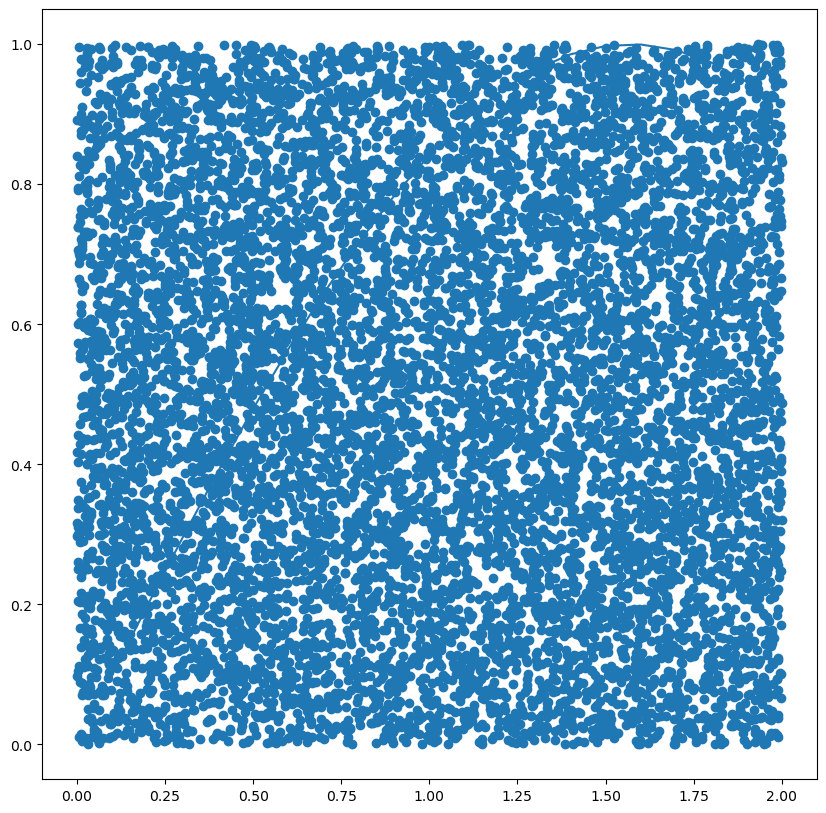

1.412999984185422


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import optimize
import random

a=0
b=2


def funcion_iterativa(z):
    return abs(math.sin(z))

prueba_funcion=funcion_iterativa

def integra_mc(fun, a, b, num_puntos):
    
    #coordenadas de puntos en el espacio
    x = [random.uniform(a,b) for i in range(num_puntos) ]
    maximo_valor= max([fun(i) for i in x])
    y=[random.uniform(0,maximo_valor)for i in range(num_puntos)]

    # generar curva
    z= [i*0.1 for i in range(num_puntos**2) if i*0.1>a and i*0.1<b]
    f_z = [fun(i) for i in z]
    
    x_dentros=[valores_dentro for valores_dentro in x if valores_dentro>a and valores_dentro<b]
    
    y_dentros=[]
    
    
    for i in range(len(x_dentros)):
        valor_y = fun(x_dentros[i])
        if y[i]< valor_y:
            y_dentros.append(y[i])
            
        

 
    # visualizar
    plt.figure(figsize=(10,10))
    
    plt.scatter(x,y)

    plt.plot(z,f_z)
    

    plt.show()
    
    integral = len(y_dentros)/num_puntos *(b-a)* maximo_valor
    print(integral)

    return integral


if __name__=='__main__':
    integra_mc(prueba_funcion,a,b,num_puntos=10000)

**comprobacion Algoritmo iterativo**

In [12]:
from scipy.integrate import quad
area,error= quad(funcion_iterativa,0,2)
print(f'El resultado de la integral es {area} con un error {error}')

El resultado de la integral es 1.4161468365471424 con un error 1.5722388241847156e-14
